In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import networkx

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

In [4]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')

In [5]:
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_merger_trees.txt')

In [6]:
snap0 = sim['SnapNumber_128']
snap0.keys()

<KeysViewHDF5 ['Groups', 'Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5', 'SubGroups']>

In [7]:
Header = snap0['Header']
Header.keys()

<KeysViewHDF5 ['BoxSize', 'HubbleParam', 'MassTable', 'Omega0', 'OmegaLambda', 'Redshift', 'Time']>

In [8]:
z = Header['Redshift'][()]
z

2.220446049250313e-16

In [9]:
#first, a list of zs
Zs, snapN = [], []

for i in range(128, 38, -1):
    sname = 'SnapNumber_{}/Header/Redshift'.format(i)
    zt = sim[sname][()]
    Zs.append(zt)
    snapN.append(i)

Zs, snapN = np.array(Zs), np.array(snapN)
Zs

array([2.22044605e-16, 2.22044605e-16, 1.16323691e-02, 2.34529576e-02,
       3.54671017e-02, 4.76803722e-02, 6.00985761e-02, 7.27278089e-02,
       8.55744153e-02, 9.86450693e-02, 1.11946745e-01, 1.25486754e-01,
       1.39272749e-01, 1.53312783e-01, 1.67615301e-01, 1.82189180e-01,
       1.97043732e-01, 2.12188790e-01, 2.27634677e-01, 2.43392258e-01,
       2.59473023e-01, 2.75889083e-01, 2.92653186e-01, 3.09778865e-01,
       3.27280376e-01, 3.45172835e-01, 3.63472248e-01, 3.82195590e-01,
       4.01360855e-01, 4.20987181e-01, 4.41094881e-01, 4.61705611e-01,
       4.82842405e-01, 5.04529855e-01, 5.26794201e-01, 5.49663484e-01,
       5.73167723e-01, 5.97339064e-01, 6.22212005e-01, 6.47823588e-01,
       6.74213684e-01, 7.01425203e-01, 7.29504462e-01, 7.58501507e-01,
       7.88470444e-01, 8.19469998e-01, 8.51563899e-01, 8.84821496e-01,
       9.19318348e-01, 9.55137018e-01, 9.92367868e-01, 1.03111004e+00,
       1.07147251e+00, 1.11357545e+00, 1.15755164e+00, 1.20354826e+00,
      

In [10]:
def getNeaSnap(z, Zs, snapN):
    """Return the snapshot number closest to the redshfit z, where Zs and snapN are a list of redshifts and snapshots"""
    ii = np.searchsorted(Zs, z)
    if z - Zs[ii-1] < Zs[ii]-z:
        return snapN[ii-1]
    else:
        return snapN[ii]

In [11]:
getNeaSnap(2, Zs, snapN)

61

In [12]:
sim['SnapNumber_60/Header/Redshift'][()], sim['SnapNumber_61/Header/Redshift'][()], sim['SnapNumber_62/Header/Redshift'][()]

(2.0977173023057873, 1.9992922213741773, 1.9079141765814382)

In [13]:
# apparently it works, lets get the fofID for a given stuff

def getFofId(fofZ0, z, tree, Zs, snapN):
    """return the snapshot and the fofid of the main progenitor of the fofz0 subgroup at redhsift z"""
    uniqueID0 = int(128*1e6+fofZ0)
    stree = networkx.dfs_tree(tree, str(uniqueID0))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID0))
    snapZ = getNeaSnap(z, Zs, snapN)
    numberFoF, nsnapL = [], [] 
    for m in mtree:
        tsnapN, tsfid = split_unique_id(int(m))
        numberFoF.append(tsfid)
        nsnapL.append(tsnapN)
    numberFoF, nsnapL = np.array(numberFoF), np.array(nsnapL)
    iid = np.where(nsnapL==snapZ)
    if iid[0].size > 0:
        iid = iid[0][0]
    else:
        raise Exception('The subgroup {} has no progenitors at redshift {}'.format(fofZ0, z))
    return snapZ, numberFoF[iid]

In [14]:
getFofId(3, 3, trees, Zs, snapN)

(53, 2170)

In [15]:
stree = networkx.dfs_tree(trees, '128000003')
mtree = get_main_branch_unique_ids(stree, '128000003')

In [16]:
mtree

['128000003',
 '127000003',
 '126000003',
 '125000003',
 '124000003',
 '123000003',
 '122000003',
 '121000003',
 '120000002',
 '119000196',
 '118000216',
 '117000209',
 '116000227',
 '115000234',
 '114000207',
 '113000208',
 '112000236',
 '111000244',
 '110000230',
 '109000228',
 '108000230',
 '107000234',
 '106000264',
 '105000277',
 '104000233',
 '103000222',
 '102000202',
 '101000230',
 '100000207',
 '99000224',
 '98000216',
 '97000224',
 '96000225',
 '95000194',
 '94000191',
 '93000186',
 '92000196',
 '91001864',
 '90001734',
 '89001844',
 '88001707',
 '87001436',
 '86001357',
 '85001471',
 '84001363',
 '83001462',
 '82001414',
 '81001582',
 '80001851',
 '79001826',
 '78001948',
 '77001747',
 '76001727',
 '75001908',
 '74001950',
 '73001907',
 '72001815',
 '71001892',
 '70001919',
 '69001901',
 '68001872',
 '67001854',
 '66001836',
 '65001993',
 '64001856',
 '63001849',
 '62001901',
 '61001874',
 '60001934',
 '59001890',
 '58001974',
 '57001937',
 '56002092',
 '55002123',
 '5400213

In [17]:
sim['SnapNumber_128/PartType0/Coordinates'].attrs['description_units']

'$h^{-1} ckpc$'

In [18]:
# ok,  it works, lets select the corresponding particles (stars, but works) at z=2 and at z=0, for fofid 1 at z=0
# first we need both set of offsets (Is the phrase "set of offsets" redundant?)
offZ0 = sim['SnapNumber_128/SubGroups/PartType0/Offsets'][1].astype(int)
snapZ2, fofZ2 = getFofId(1, 2, trees, Zs, snapN)
offZ2 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ2)][fofZ2].astype(int)

In [19]:
# and now I can read the particles at both redshifts, but I need the positions at Z0 of the particles 
CoorStarsZ0 = sim['SnapNumber_128/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

starsZ0all = sim['SnapNumber_128/PartType0/ParticleIDs'][()] # I need all particles
starsZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [20]:
# and look for the particles that were part of the subhalo at z=2 at z=0
Ids = np.in1d(starsZ0all, starsZ2)
Ids2 = np.where(Ids)[0] #Create a index array where  IDs == True

In [21]:
CoorStarsZ2atZ0 = sim['SnapNumber_128/PartType0/Coordinates'][Ids2]

Text(0, 0.5, 'z/ckpc')

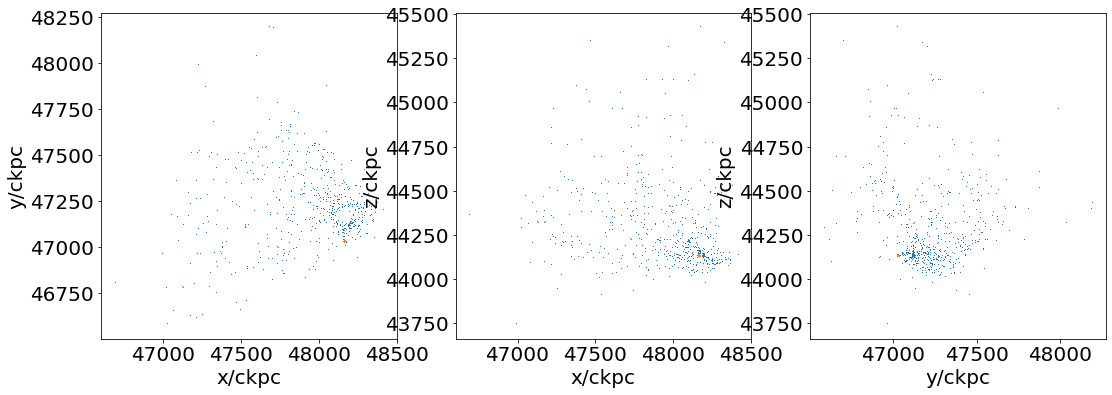

In [22]:
# and lets take a look
pl.figure(figsize=(18,6))

xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

pl.subplot(1,3,1)
pl.plot(xz2, yz2, marker=',', ls=' ')
pl.plot(xz0, yz0, marker=',', ls=' ')

pl.xlabel('x/ckpc')
pl.ylabel('y/ckpc')

pl.subplot(1, 3, 2)
pl.plot(xz2, zz2, marker=',', ls=' ')
pl.plot(xz0, zz0, marker=',', ls=' ')

pl.xlabel('x/ckpc')
pl.ylabel('z/ckpc')

pl.subplot(1, 3, 3)
pl.plot(yz2, zz2, marker=',', ls=' ')
pl.plot(yz0, zz0, marker=',', ls=' ')

pl.xlabel('y/ckpc')
pl.ylabel('z/ckpc')

In [23]:
#projection?
PMat = sim['SnapNumber_128/SubGroups/PartType0/RotationMatrix'][1]

In [24]:
PMat

array([[ 0.02755076,  0.78996478,  0.61253294],
       [ 0.78996478,  0.35827565, -0.49758839],
       [-0.61253294,  0.49758839, -0.61417359]])

In [25]:
rotCoorZ0 = []
for co in CoorStarsZ0:
    rotC = np.matmul(PMat, co)
    rotCoorZ0.append(rotC)

rotCoorZ0 = np.array(rotCoorZ0)

Text(0, 0.5, 'z/(ckpc h^{-1})')

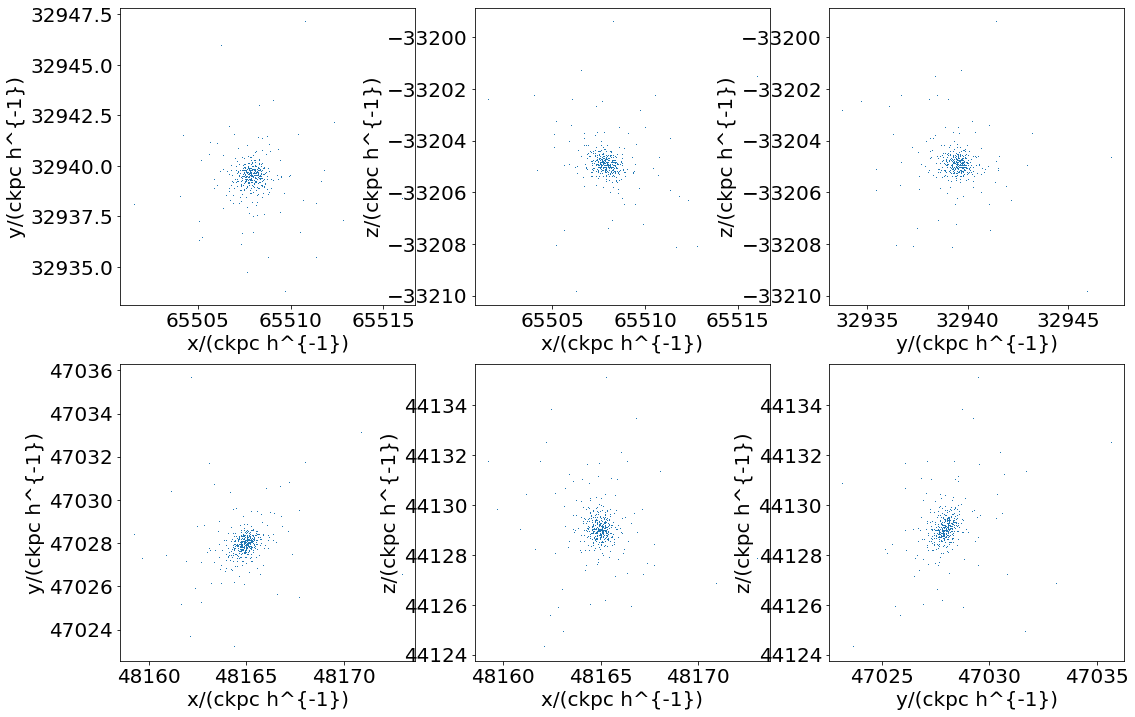

In [26]:
pl.figure(figsize=(18,12))

xz0, yz0, zz0 = rotCoorZ0[:,0], rotCoorZ0[:,1], rotCoorZ0[:,2]
xznr, yznr, zznr = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]

pl.subplot(2,3,1)
pl.plot(xz0, yz0, marker=',', ls=' ')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(2, 3, 2)
pl.plot(xz0, zz0, marker=',', ls=' ')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(2, 3, 3)
pl.plot(yz0, zz0, marker=',', ls=' ')

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(2,3,4)
pl.plot(xznr, yznr, marker=',', ls=' ')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(2, 3, 5)
pl.plot(xznr, zznr, marker=',', ls=' ')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(2, 3, 6)
pl.plot(yznr, zznr, marker=',', ls=' ')

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [27]:
sim['SnapNumber_128/SubGroups/PartType0/RotationMatrix'][1], sim['SnapNumber_128/SubGroups/PartType4/RotationMatrix'][1] 

(array([[ 0.02755076,  0.78996478,  0.61253294],
        [ 0.78996478,  0.35827565, -0.49758839],
        [-0.61253294,  0.49758839, -0.61417359]]),
 array([[ 0.02755076,  0.78996478,  0.61253294],
        [ 0.78996478,  0.35827565, -0.49758839],
        [-0.61253294,  0.49758839, -0.61417359]]))

In [28]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z/(ckpc h^{-1})')

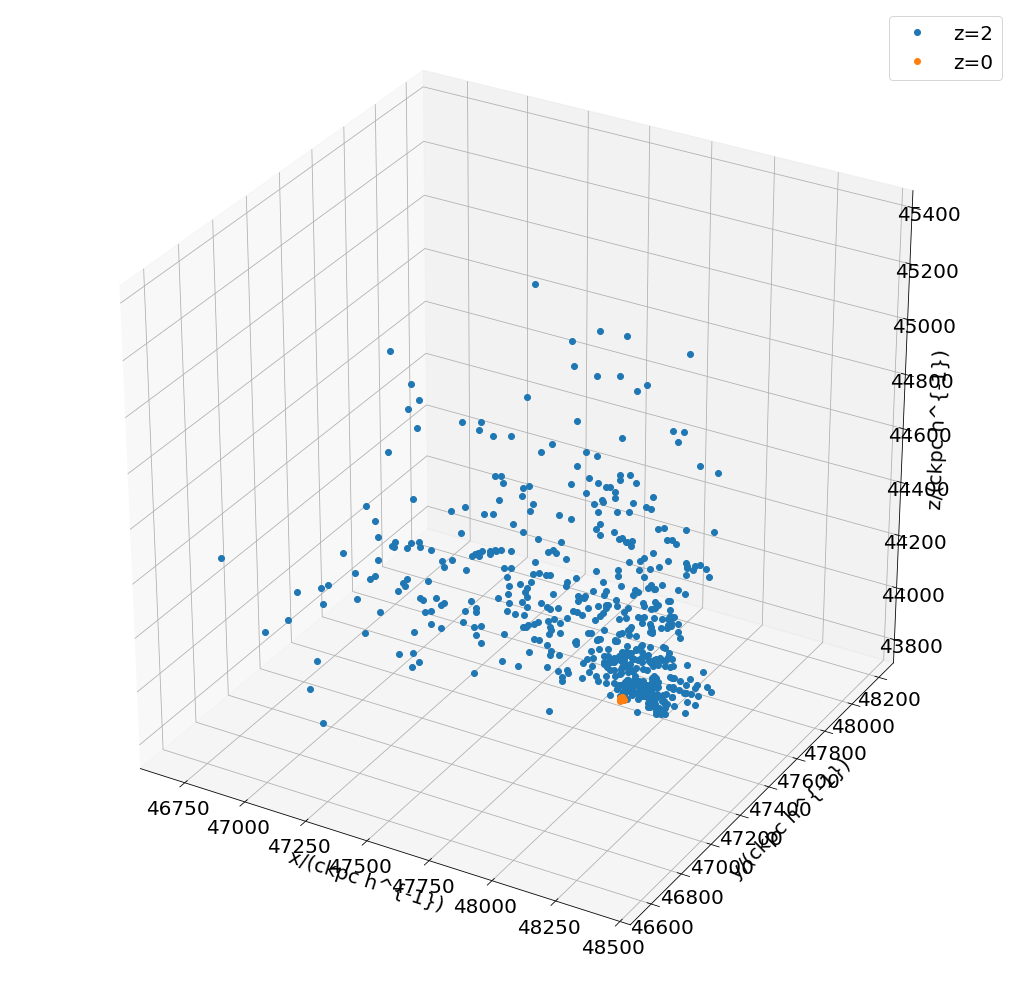

In [29]:
fig = pl.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)
xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

#ax.scatter(xz2, yz2, zz2, marker=',', label='z=2', zorder=-20)
#ax.scatter(xz0, yz0, zz0, marker='o', label='z=0', zorder=10)

ax.plot(xz2, yz2, zz2, marker='o', label='z=2', ls='', zorder=-20)
ax.plot(xz0, yz0, zz0, marker='o', label='z=0', ls='', zorder=10)

pl.legend(loc='best')
ax.set_xlabel('x/(ckpc h^{-1})')
ax.set_ylabel('y/(ckpc h^{-1})')
ax.set_zlabel('z/(ckpc h^{-1})')

Text(0.5, 0, 'z/(ckpc h^{-1})')

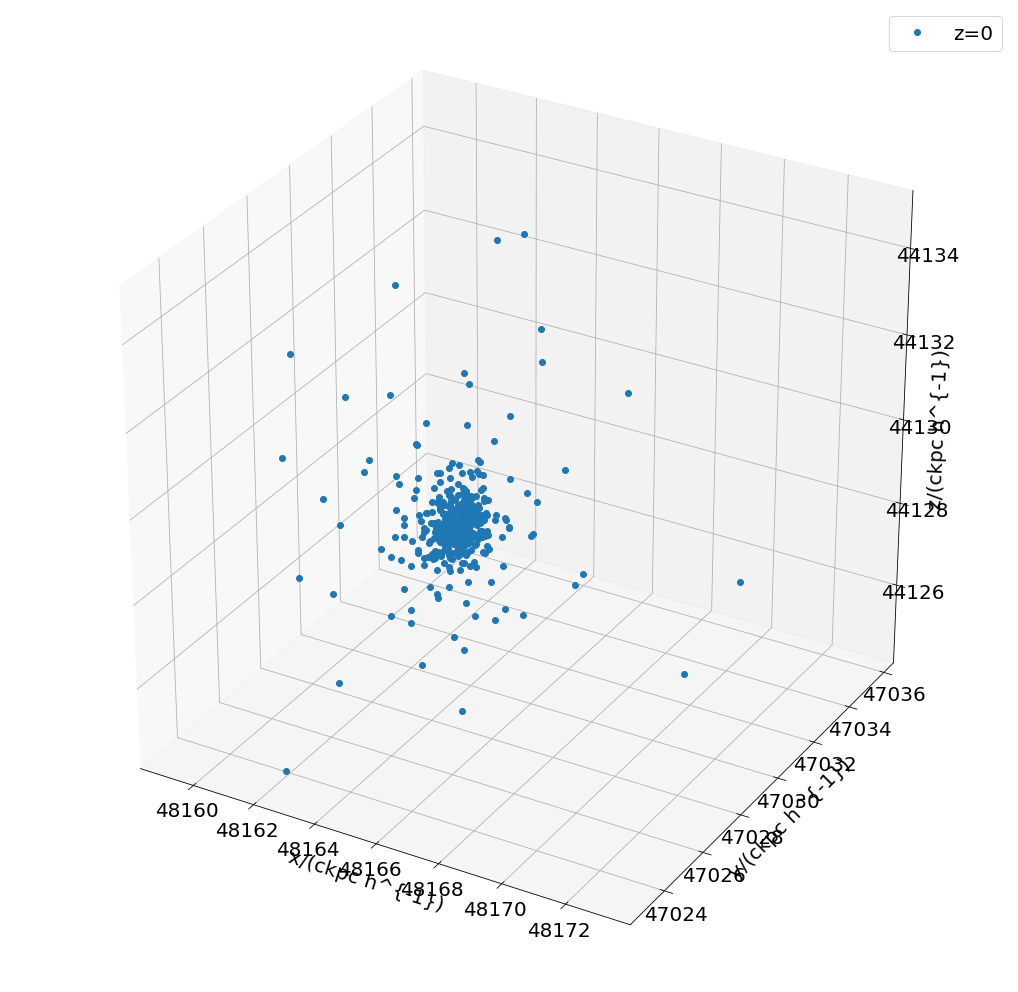

In [30]:
fig = pl.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)
xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

#ax.scatter(xz2, yz2, zz2, marker=',', label='z=2', zorder=-20)
#ax.scatter(xz0, yz0, zz0, marker='o', label='z=0', zorder=10)

#ax.plot(xz2, yz2, zz2, marker='o', label='z=2', ls='', zorder=-20)
ax.plot(xz0, yz0, zz0, marker='o', label='z=0', ls='', zorder=10)

pl.legend(loc='best')
ax.set_xlabel('x/(ckpc h^{-1})')
ax.set_ylabel('y/(ckpc h^{-1})')
ax.set_zlabel('z/(ckpc h^{-1})')

In [31]:
# and several redshifts
fofID = 45

offZ0 = sim['SnapNumber_128/SubGroups/PartType0/Offsets'][fofID].astype(int)
snapZp5, fofZp5 = getFofId(fofID, 0.5, trees, Zs, snapN)
snapZ1, fofZ1 = getFofId(fofID, 1, trees, Zs, snapN)
snapZ1p5, fofZ1p5 = getFofId(fofID, 1.5, trees, Zs, snapN)
snapZ2, fofZ2 = getFofId(fofID, 2., trees, Zs, snapN)

In [32]:
offZp5 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZp5)][fofZp5].astype(int)
offZ1 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ1)][fofZ1].astype(int)
offZ1p5 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ1p5)][fofZ1p5].astype(int)
offZ2 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ2)][fofZ2].astype(int)

In [33]:
offZ0, offZp5, offZ1, offZ1p5, offZ2

(array([696049, 704727]),
 array([611438, 618085]),
 array([525616, 530701]),
 array([419852, 423024]),
 array([401071, 402774]))

In [34]:
CoorZ0 = sim['SnapNumber_128/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

pZ0all = sim['SnapNumber_128/PartType0/ParticleIDs'][()] # I need all particles

pZp5 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZp5)][offZp5[0]:offZp5[1]]
pZ1 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ1)][offZ1[0]:offZ1[1]]
pZ1p5 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ1p5)][offZ1p5[0]:offZ1p5[1]]
pZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [35]:
IdsP5 = np.in1d(pZ0all, pZp5)
IdsP5_ = np.where(IdsP5)[0]

Ids1 = np.in1d(pZ0all, pZ1)
Ids1_ = np.where(Ids1)[0]

Ids1P5 = np.in1d(pZ0all, pZ1p5)
Ids1P5_ = np.where(Ids1P5)[0]

Ids2 = np.in1d(pZ0all, pZ2)
Ids2_ = np.where(Ids2)[0]

In [36]:
CoorZp5atZ0 = sim['SnapNumber_128/PartType0/Coordinates'][IdsP5_]
CoorZ1atZ0 = sim['SnapNumber_128/PartType0/Coordinates'][Ids1_]
CoorZ1p5atZ0 = sim['SnapNumber_128/PartType0/Coordinates'][Ids1P5_]
CoorZ2atZ0 = sim['SnapNumber_128/PartType0/Coordinates'][Ids2_]

Text(0, 0.5, 'z/(ckpc h^{-1})')

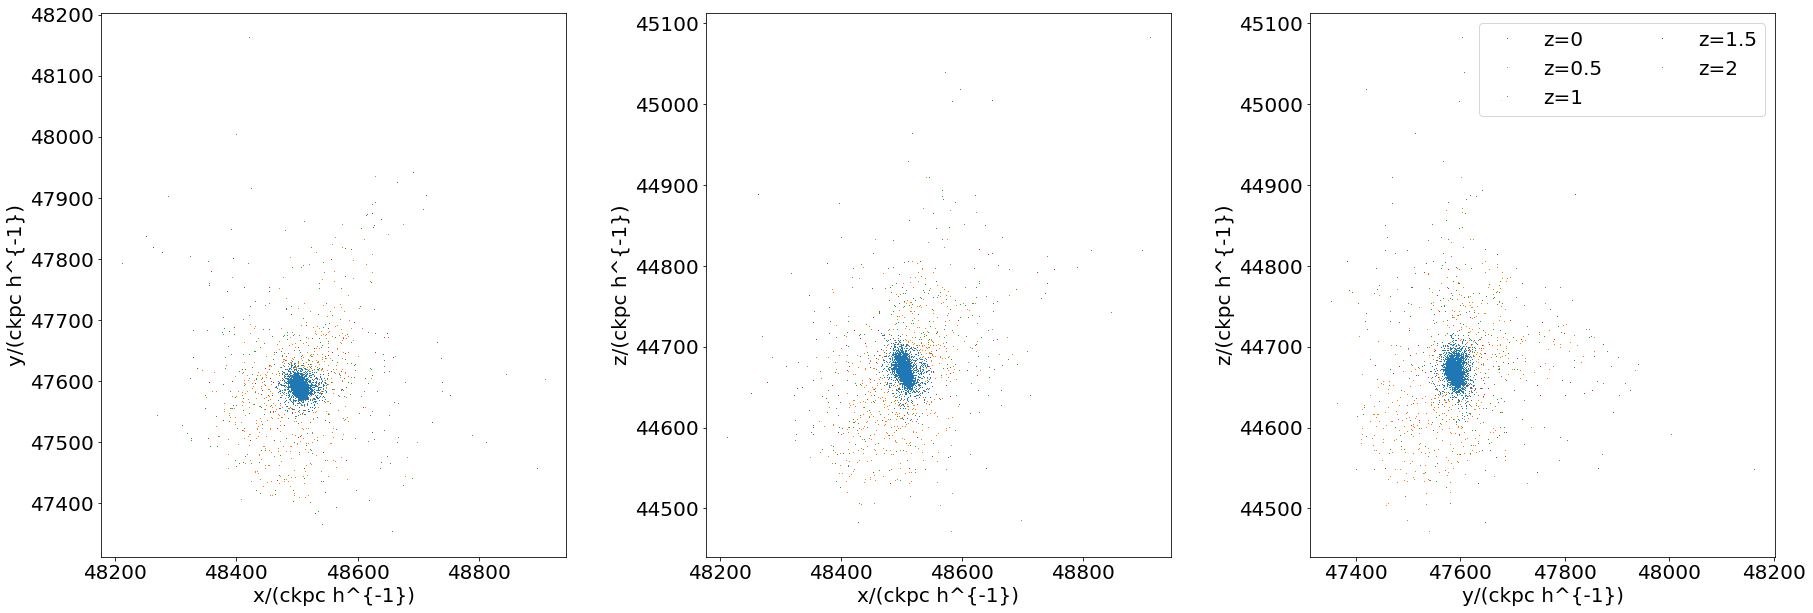

In [37]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, yzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, yz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, yz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=',', ls=' ', label='z=2', zorder=2)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, zzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, zz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, zz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=',', ls=' ', label='z=2', zorder=2)


pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(yzp5, zzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(yz1, zz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(yz1p5, zz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=',', ls=' ', label='z=2', zorder=2)

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [38]:
z0centre = sim['SnapNumber_128/SubGroups/SubGroupPos'][fofID]

Text(0, 0.5, 'z/(ckpc h^{-1})')

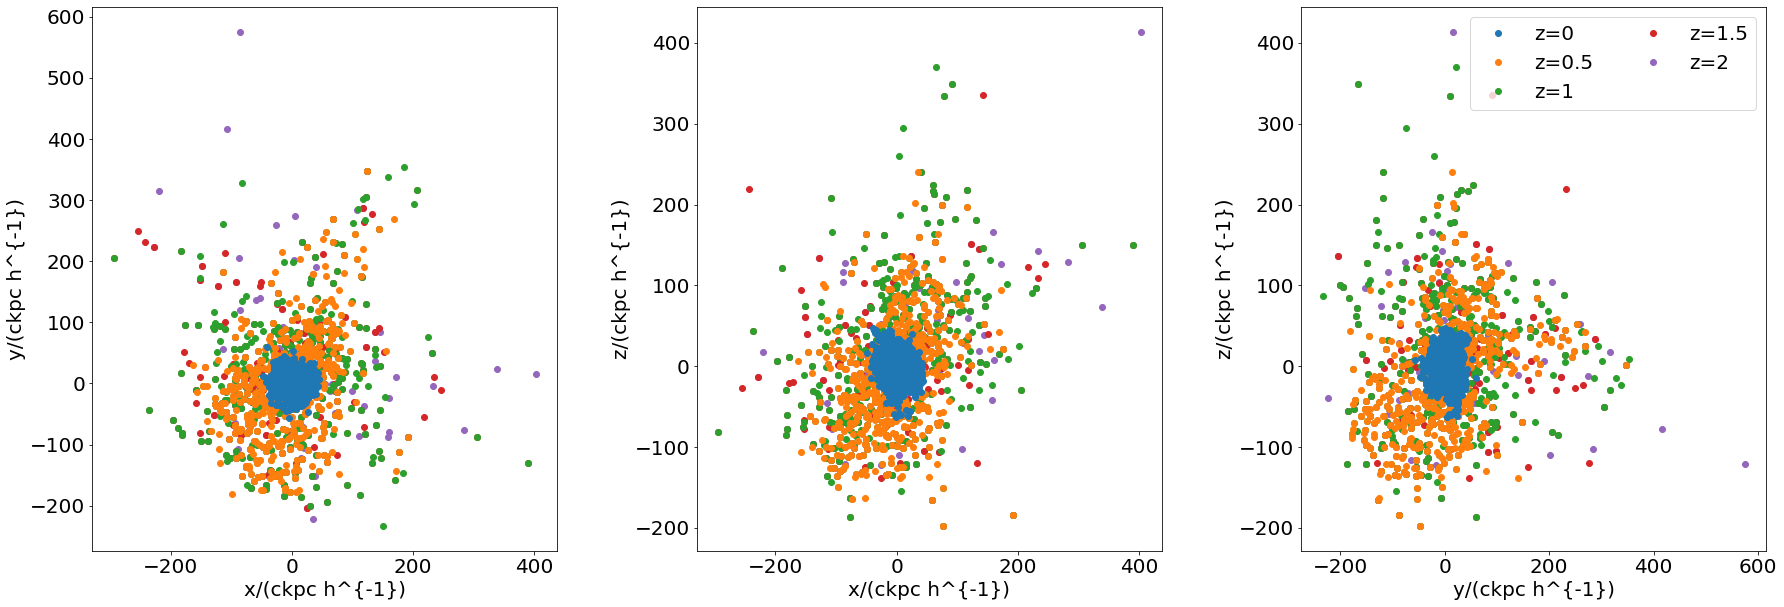

In [39]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

mark = 'o'

xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]

xz0, yz0, zz0 = xz0 - z0centre[0], yz0 - z0centre[1], zz0 - z0centre[2]
xzp5, yzp5, zzp5 = xzp5 - z0centre[0], yzp5 - z0centre[1], zzp5 - z0centre[2]
xz1, yz1, zz1 = xz1 - z0centre[0], yz1 - z0centre[1], zz1 - z0centre[2]
xz1p5, yz1p5, zz1p5 = xz1p5 - z0centre[0], yz1p5 - z0centre[1], zz1p5 - z0centre[2]
xz2, yz2, zz2 = xz2 - z0centre[0], yz2 - z0centre[1], zz2 - z0centre[2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, yzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, yz1, marker=mark, ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, yz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)


pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(yzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(yz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
pl.plot(yz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

Text(0, 0.5, 'z/(ckpc h^{-1})')

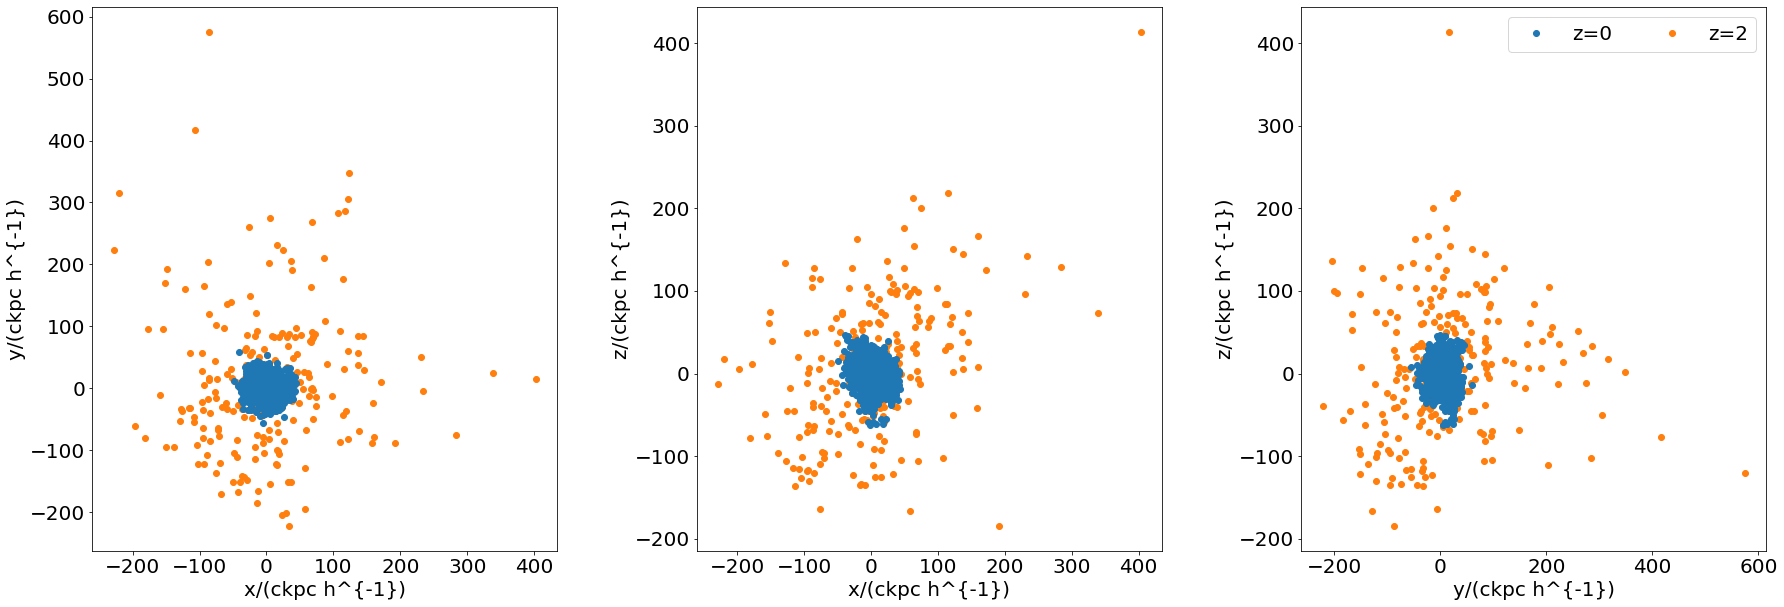

In [40]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

mark = 'o'

xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]

xz0, yz0, zz0 = xz0 - z0centre[0], yz0 - z0centre[1], zz0 - z0centre[2]
xzp5, yzp5, zzp5 = xzp5 - z0centre[0], yzp5 - z0centre[1], zzp5 - z0centre[2]
xz1, yz1, zz1 = xz1 - z0centre[0], yz1 - z0centre[1], zz1 - z0centre[2]
xz1p5, yz1p5, zz1p5 = xz1p5 - z0centre[0], yz1p5 - z0centre[1], zz1p5 - z0centre[2]
xz2, yz2, zz2 = xz2 - z0centre[0], yz2 - z0centre[1], zz2 - z0centre[2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(xzp5, yzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(xz1, yz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(xz1p5, yz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(xzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(xz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(xz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)


pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(yzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(yz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(yz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [41]:
# lest separate the ids that were part of the subgroups at z=0, but today are not:

pZ0 = sim['SnapNumber_128/PartType0/ParticleIDs'][offZ0[0]:offZ0[1]]
IdsC = np.in1d(pZ2, pZ0)
IdsC_ = np.where(IdsC==False)[0]
IdsC_.size

909

In [42]:
#lets see stellar masses and stuff.
stOffsets = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][fofID].astype('int')
StMassesZ0 = sim['SnapNumber_128/PartType4/Masses'][stOffsets[0]:stOffsets[1]]
GasMassesZ0 = sim['SnapNumber_128/PartType0/Masses'][offZ0[0]:offZ0[1]]
GasMassesNZ0 = sim['SnapNumber_128/PartType0/Masses'][IdsC_]
GassAbundancesNZ0 = sim['SnapNumber_128/PartType0/Abundances'][IdsC_]

In [43]:
print('Log Stellar Mass Z=0:',np.log10(np.sum(StMassesZ0)*1e10),'/log(M_{sun}/h)')
print('Log Gas Lost from Z=2:',np.log10(np.sum(GasMassesNZ0)*1e10),'/log(M_{sun}/h)')
print('Gas Mass:',np.log10(np.sum(GasMassesZ0)*1e10),'/log(M_{sun}/h)')

Log Stellar Mass Z=0: 8.513484969747509 /log(M_{sun}/h)
Log Gas Lost from Z=2: 8.206556045402177 /log(M_{sun}/h)
Gas Mass: 9.209508304592143 /log(M_{sun}/h)


In [44]:
sim['SnapNumber_128/PartType0/Abundances'].attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

In [45]:
elements = ['He', 'C', 'Mg', 'O', 'Fe', 'Si', 'H', 'N', 'Ne', 'S', 'Ca', 'Zi']

for i, el in enumerate(elements):
    Abd = GassAbundancesNZ0[:,i]
    MassT = Abd
    print('Log {} Lost from Z=2:'.format(el),np.log10(np.sum(MassT)*1e10),'/log(M_{sun}/h)')

Log He Lost from Z=2: 7.627428779876841 /log(M_{sun}/h)
Log C Lost from Z=2: 5.483983725122746 /log(M_{sun}/h)
Log Mg Lost from Z=2: 4.856804881740766 /log(M_{sun}/h)
Log O Lost from Z=2: 6.353685931746287 /log(M_{sun}/h)
Log Fe Lost from Z=2: 5.295352280106773 /log(M_{sun}/h)
Log Si Lost from Z=2: 5.4138036667247365 /log(M_{sun}/h)
Log H Lost from Z=2: 8.060409869861454 /log(M_{sun}/h)
Log N Lost from Z=2: 4.665655986585116 /log(M_{sun}/h)
Log Ne Lost from Z=2: 5.44778293897651 /log(M_{sun}/h)
Log S Lost from Z=2: 5.123656162315708 /log(M_{sun}/h)
Log Ca Lost from Z=2: 4.25225333485136 /log(M_{sun}/h)
Log Zi Lost from Z=2: 3.1369203601465863 /log(M_{sun}/h)


In [46]:
sim['SnapNumber_128/SubGroups/GroupNumber'][1],sim['SnapNumber_128/SubGroups/GroupNumber'][2],sim['SnapNumber_128/SubGroups/GroupNumber'][30],sim['SnapNumber_128/SubGroups/GroupNumber'][45]

(0, 0, 1, 3)

In [47]:
sim['SnapNumber_128/Groups/GroupNsubs'][0], sim['SnapNumber_128/Groups/GroupNsubs'][1], sim['SnapNumber_128/Groups/GroupNsubs'][3]

(30, 9, 4)

In [48]:
sim['SnapNumber_128/Groups/GroupCM'][0], sim['SnapNumber_128/SubGroups/GroupNumber'][1]

(array([48191.67, 47116.14, 44133.55], dtype=float32), 0)

In [49]:
# half massess
groups = sim['SnapNumber_128/SubGroups/GroupNumber'][()]
i1 = np.where(groups==0)[0]
massG1 = sim['SnapNumber_128/SubGroups/SubGroupHalfMass'][i1]

for ii, mm in zip(i1, massG1):
    print(ii, mm)

0 29.614592
1 3.591484
2 1.7548673
3 2.0964956
4 1.1494336
5 1.9230258
6 1.5590684
7 1.1882001
8 1.1597617
9 1.3661994
10 1.6392479
11 1.2799512
12 1.9395899
13 2.0767808
14 1.4015002
15 1.8736689
16 2.0056872
17 1.5143207
18 2.6406076
19 1.7726673
20 2.1527443
21 2.0228078
22 1.1463497
23 1.6369238
24 1.040574
25 1.1759629
26 1.3446921
27 1.6302218
28 1.1038872
29 1.6166873


In [50]:
i2 = np.where(groups==1)[0]
massG2 = sim['SnapNumber_128/SubGroups/SubGroupHalfMass'][i2]

for ii, mm in zip(i2, massG2):
    print(ii, mm)

30 21.61527
31 3.6198483
32 2.736397
33 1.6697974
34 3.0701485
35 1.4368471
36 1.6102186
37 1.4072587
38 1.5040939


In [51]:
i3 = np.where(groups==3)[0]
massG3 = sim['SnapNumber_128/SubGroups/SubGroupHalfMass'][i3]

for ii, mm in zip(i3, massG3):
    print(ii, mm)

45 14.514615
46 1.8256277
47 1.2969868
48 1.4740026


In [52]:
np.sum(GasMassesNZ0), np.sum(GassAbundancesNZ0)

(0.01609, 0.016090002)

In [53]:
# lest take a look if a selected the particles that no longer belong to the subhaloes at z=0
IdsC_a = np.where(IdsC)[0]
IdsC_.size, IdsC_a.size

(909, 794)

In [54]:
AreNot = sim['SnapNumber_128/PartType0/Coordinates'][IdsC_]
Are = sim['SnapNumber_128/PartType0/Coordinates'][IdsC_a]
All = sim['SnapNumber_128/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

Text(0, 0.5, 'z')

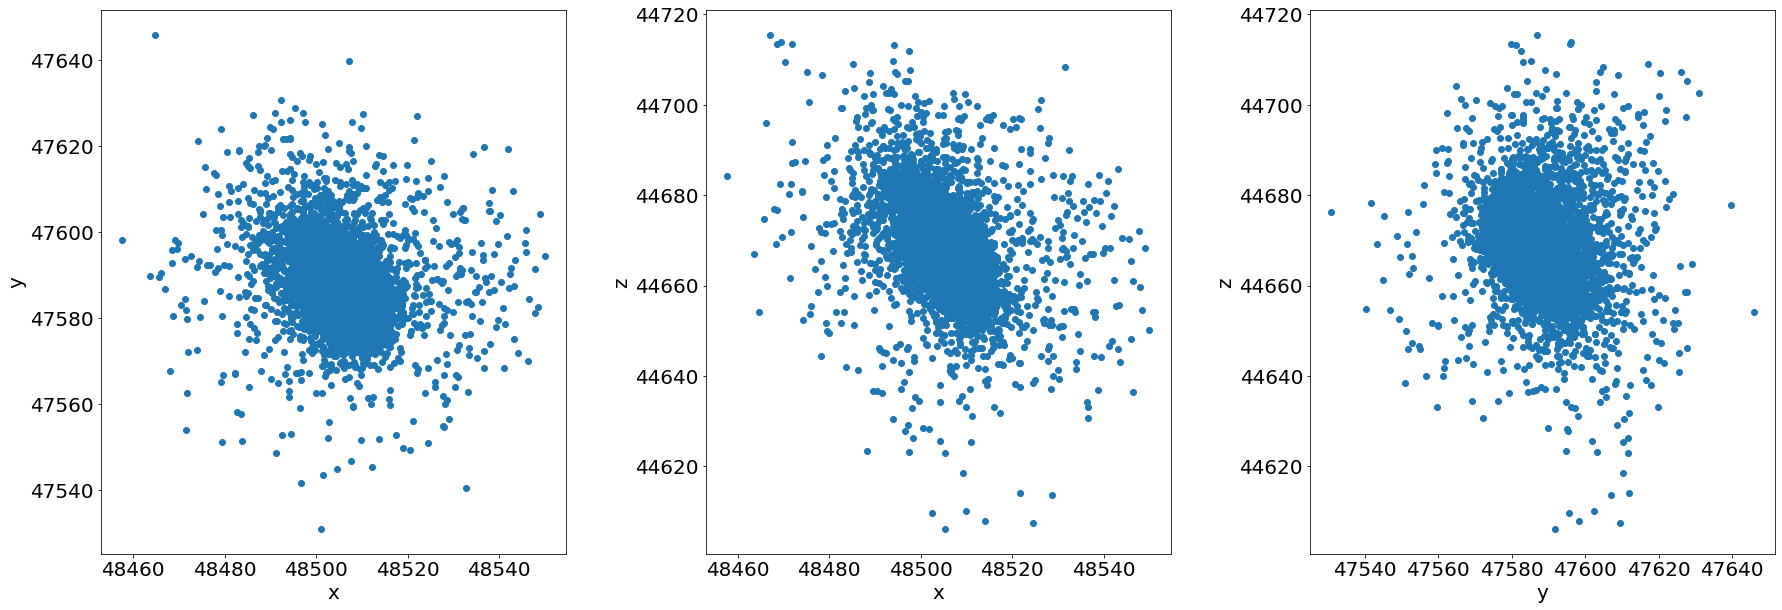

In [55]:
pl.figure(figsize=(30,10))

xA, yA, zA = Are[:,0], Are[:,1], Are[:,2]
xN, yN, zN = AreNot[:,0], AreNot[:,1], AreNot[:,2]
x, y , z = All[:,0], All[:,1], All[:,2]

pl.subplots_adjust(wspace=0.3)

mark = 'o'

pl.subplot(1,3,1)
#pl.plot(xA, yA, marker=mark, ls='', label='are')
#pl.plot(xN, yN, marker=mark, ls='', label='are not')
pl.plot(x, y, marker=mark, ls='', label='all')

pl.xlabel('x')
pl.ylabel('y')

pl.subplot(1,3,2)
#pl.plot(xA, zA, marker=mark, ls='', label='are')
#pl.plot(xN, zN, marker=mark, ls='', label='are not')
pl.plot(x, z, marker=mark, ls='', label='all')

pl.xlabel('x')
pl.ylabel('z')

pl.subplot(1,3,3)
#pl.plot(yA, zA, marker=mark, ls='', label='are')
#pl.plot(yN, zN, marker=mark, ls='', label='are not')
pl.plot(y, z, marker=mark, ls='', label='all')

pl.xlabel('y')
pl.ylabel('z')

In [56]:
IdsZ0 = sim['SnapNumber_128/PartType0/ParticleIDs'][offZ0[0]:offZ0[1]]
IdsZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [57]:
IdsAllZ0 = sim['SnapNumber_128/PartType0/ParticleIDs'][()]

In [58]:
IDsToday = np.in1d(IdsAllZ0, IdsZ2)
IDsToday_ = np.where(IDsToday)[0]

In [59]:
AllToday = sim['SnapNumber_128/PartType0/Coordinates'][IDsToday_]

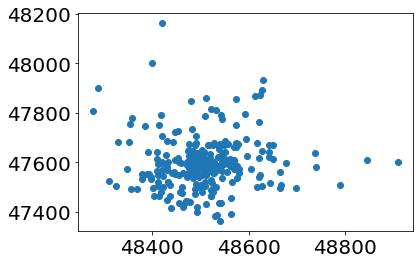

In [60]:
x, y = AllToday[:,0], AllToday[:,1]

pl.plot(x,y, marker='o',ls='')

In [61]:
IDsToday_.size, IdsZ2.size

(1028, 1703)

In [62]:
IdsSurviving = sim['SnapNumber_128/PartType0/ParticleIDs'][IDsToday_]

In [63]:
are = np.in1d(IdsSurviving, IdsZ0)
are_ = np.where(are)
arenot_ = np.where(are==False)
IDs_Today_are = IDsToday_[are_]
IDs_Today_not = IDsToday_[arenot_]

In [64]:
IDs_Today_are.size, IDs_Today_not.size

(794, 234)

In [65]:
posAre = sim['SnapNumber_128/PartType0/Coordinates'][IDs_Today_are]
posNot = sim['SnapNumber_128/PartType0/Coordinates'][IDs_Today_not]

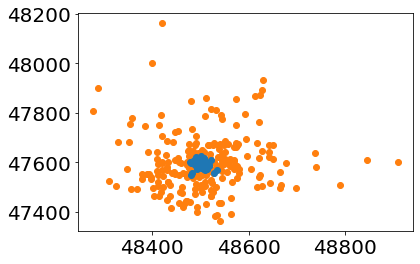

In [66]:
xa, ya = posAre[:,0], posAre[:,1]
xn, yn = posNot[:,0], posNot[:,1]

pl.plot(xa,ya, marker='o',ls='', zorder=1)
pl.plot(xn,yn, marker='o',ls='',zorder=0)

In [67]:
# ok, we got the correct index, let sum up the stuff
TodMassNot = sim['SnapNumber_128/PartType0/Masses'][IDs_Today_not]
TodAbunNot = sim['SnapNumber_128/PartType0/Abundances'][IDs_Today_not]

In [68]:
print('Mass', np.sum(TodMassNot), np.log10(np.sum(TodMassNot*1e10)))

Mass 0.004646755 7.6671495


In [69]:
print(np.sum(TodAbunNot))

for i, el in enumerate(elements):
    Abd = TodAbunNot[:,i]
    print(el, np.log10(np.sum(Abd)*1e10))

0.004646755
He 7.059347863544359
C 4.386988764797086
Mg 3.683856763663214
O 5.1910427518034865
Fe 4.280841008863995
Si 4.294730626228146
H 7.5409796188938305
N 2.6370382789578226
Ne 4.197603059029758
S 4.012294360525655
Ca 3.152135951813302
Zi 1.9395702729845496
